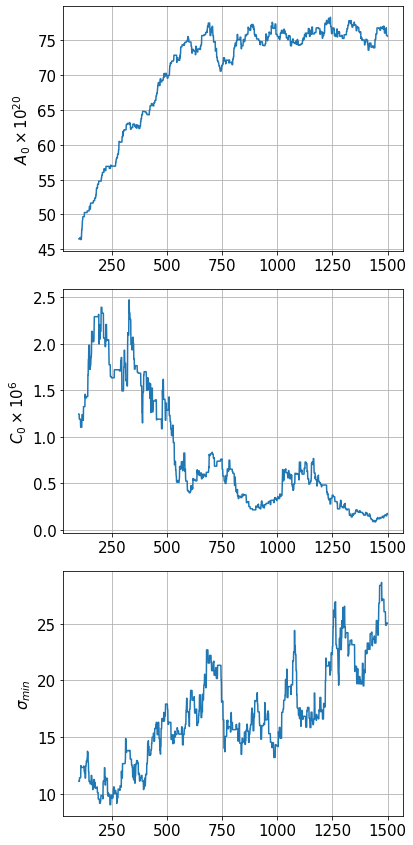

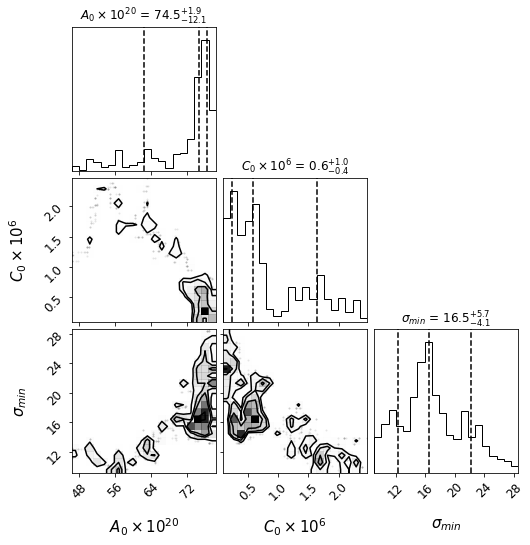

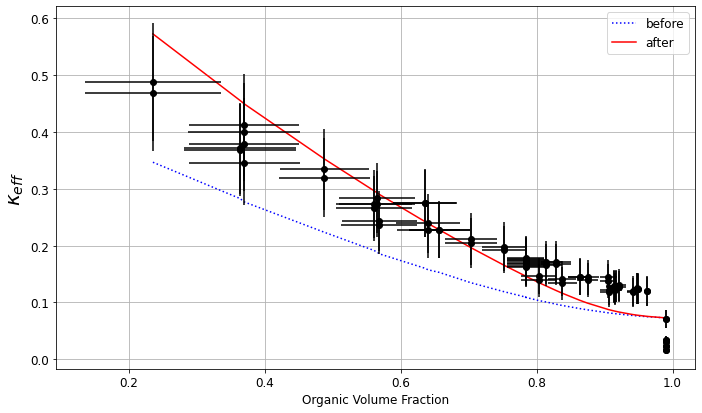

<Figure size 720x432 with 0 Axes>

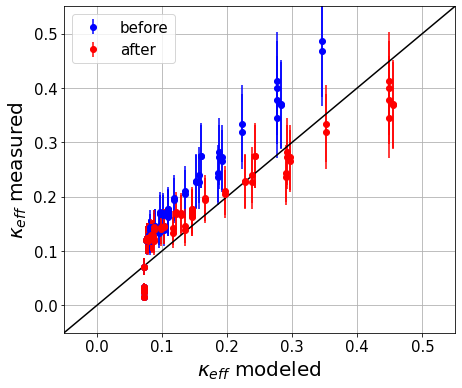

In [2]:
import numpy as np
import os
from importlib import reload

from PySDM.physics import si

from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark

import PySDM_examples.Singer_Ward.mcmc_plots
reload(PySDM_examples.Singer_Ward.mcmc_plots)
from PySDM_examples.Singer_Ward.mcmc_plots import plot_param_chain, plot_corner, plot_ovf_kappa_fit, plot_keff

filename = "bcary_dark.csv"

# model = "CompressedFilmOvadnevaite"
# N = 1000
model = "SzyszkowskiLangmuir"
N = 1500
# model = "CompressedFilmRuehl"
# N = 5000

######
# open data file
######
ds = np.loadtxt("data/" + filename, skiprows=1, delimiter=",")
if filename == "bcary_dark.csv":
    ds = np.delete(ds, [26, 65], axis=0)  # remove outliers
r_dry = ds[:, 0] / 2 * 1e-9
ovf = np.minimum(ds[:, 1], 0.99)
d_ovf = ds[:, 2]
kappa_eff = ds[:, 3]
d_kappa_eff = ds[:, 4]
T = 300 * si.K

datay = kappa_eff
errory = d_kappa_eff

aerosol_list = [AerosolBetaCaryophylleneDark(ovfi) for ovfi in ovf]
args = [T, r_dry, ovf, aerosol_list, model]

modelname = model.split("CompressedFilm")[-1]
aerosolname = aerosol_list[0].__class__.__name__.split("Aerosol")[-1]
outputfile = "mcmc_output/" + aerosolname + "_" + modelname + "_chain" + str(N) + ".csv"
param_chain = np.loadtxt(outputfile, delimiter=",").T

plot_param_chain(param_chain, args, savetxt=False)
plot_corner(param_chain, args)
plot_ovf_kappa_fit(param_chain, args, d_ovf, datay, errory)
plot_keff(param_chain, args, datay, errory)